In [4]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [6]:
News = pd.read_csv('Cloud')

In [8]:
text = News.Article[0]

In [9]:
wordcloud = WordCloud().generate(text)

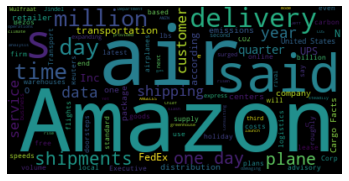

In [10]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

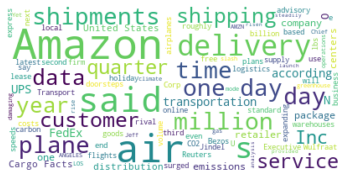

In [11]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

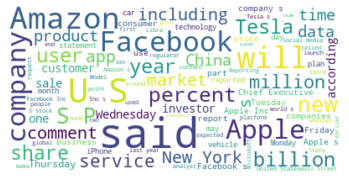

In [22]:
text = " ".join(Article for Article in News)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
News = News.Article.dropna()

In [32]:
stopwords = set(STOPWORDS)
stopwords.update(["said", 's', 'u'])

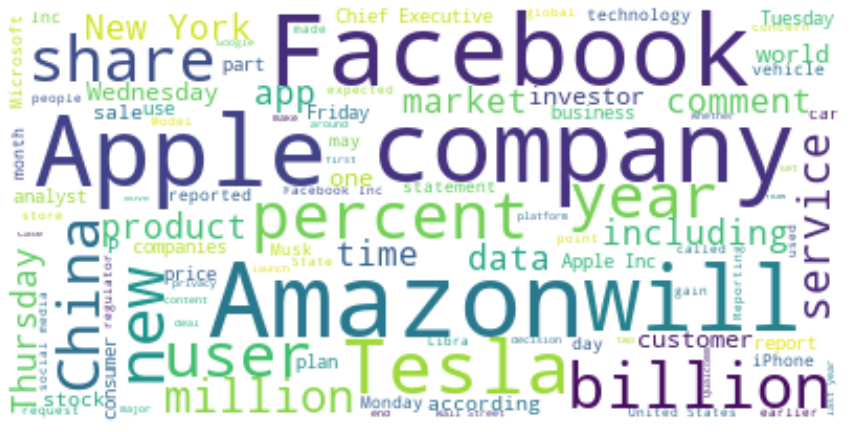

In [33]:
text = " ".join(Article for Article in News)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

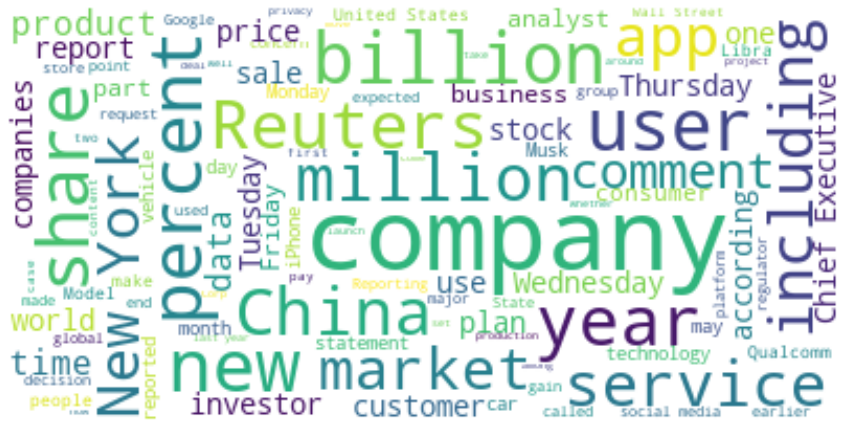

In [38]:
stopwords.update(["said", 's', 'u', 'Facebook', 'Amazon', 'Tesla', 'Apple', 'will', 'inc', 'p', 'microsoft'])

text = " ".join(Article for Article in News)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
wordcloud.to_file("first_review.png")

In [41]:
wine_mask = np.array(Image.open(r'C:\Users\kozyr\Downloads\cloud.png'))

In [42]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kozyr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The 30 most common words are as follows

us :  864
apple :  812
company :  742
facebook :  732
new :  720
amazon :  548
percent :  502
also :  487
data :  398
billion :  363
s&p :  362
tesla :  355
market :  332
last :  327
year :  313
could :  298
users :  294
trade :  285
shares :  272
technology :  270
including :  269
million :  266
companies :  261
chief :  256
services :  239
service :  227
sales :  223
500 :  214
according :  213
app :  213


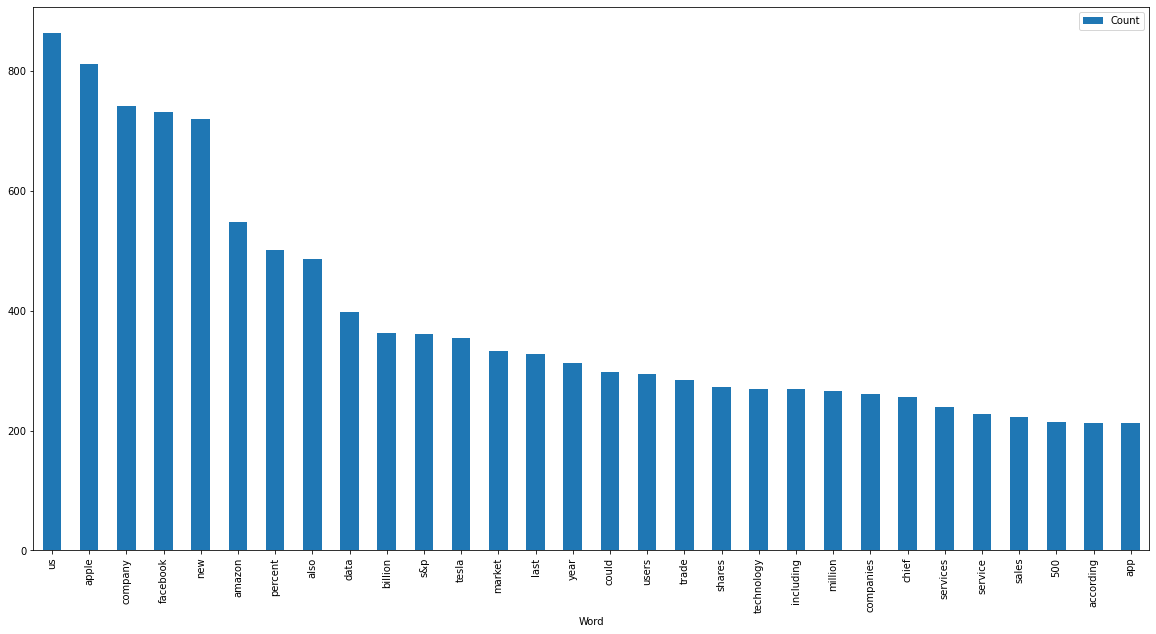

In [50]:
import nltk
import collections
nltk.download('stopwords')
news = News.astype(str)
a = ''
for new in news:
    a += new

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords = stopwords.union(set(['reuters','would','(reuters)','-',"said", 's', 'u', 'Facebook', 'Amazon', 'Tesla', 'Apple', 'will', 'inc', 'p', 'microsoft']))
wordcount = {}
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = 30
print("The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
lst = word_counter.most_common(n_print)
df1 = pd.DataFrame(lst, columns = ['Word', 'Count'])
df1.plot.bar(x='Word',y='Count',figsize=(20, 10))

In [49]:
df1.to_excel('words.xlsx')